Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Iteration 0 Accuracy=0.52 Cross Entropy Loss=114.74471 Mean Squared Error=44.922947
Test Accuracy=0.2921 Cross Entropy Loss=22997.613 Mean Squared Error=8994.336 

Iteration 100 Accuracy=0.88 Cross Entropy Loss=75.74567 Mean Squared Error=34.07848
Test Accuracy=0.7844 Cross Entropy Loss=15631.967 Mean Squared Error=6945.5317 

Iteration 200 Accuracy=0.88 Cross Entropy Loss=47.669987 Mean Squared Error=21.28165
Test Accuracy=0.8724 Cross Entropy Loss=9692.778 Mean Squared Error=4321.713 

Iteration 300 Accuracy=0.9 Cross Entropy Loss=32.474155 Mean Squared Error=13.553048
Test Accuracy=0.9397 Cross Entropy Loss=6110.321 Mean Squared Error=2489.974 

Iteration 400 Accuracy=0.92 Cross Entropy Loss=24.504185 Mean Squared Error=8.18327
Test Accuracy=0.9493 Cross Entropy Loss=4308.7764 Mean Squared Er

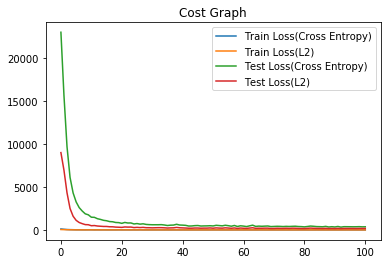

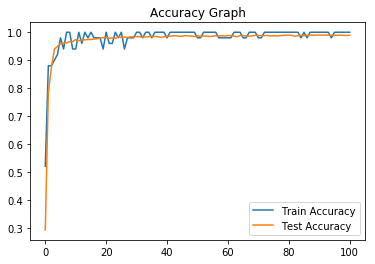

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("data/mnist",one_hot=True,reshape=False)

tr_acc=[]
tr_mse=[]
tr_xent=[]

te_acc=[]
te_mse=[]
te_xent=[]


X=tf.placeholder(tf.float32,[None,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])

wc1=tf.Variable(tf.random.truncated_normal([5,5,1,16],stddev=0.8))
bc1=tf.Variable(tf.zeros(16))

wc2=tf.Variable(tf.random.truncated_normal([4,4,16,32],stddev=0.1))
bc2=tf.Variable(tf.zeros(32))

wd1=tf.Variable(tf.random.truncated_normal([7*7*32,16],stddev=0.1))
bd1=tf.Variable(tf.zeros(16))

wdo=tf.Variable(tf.zeros([16,10]))
bdo=tf.Variable(tf.zeros(10))


yc1=tf.nn.relu(tf.nn.conv2d(X, wc1,strides=[1,1,1,1],padding="SAME")+bc1)
yc1=tf.nn.max_pool(yc1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

yc2=tf.nn.relu(tf.nn.conv2d(yc1,wc2,strides=[1,1,1,1],padding="SAME")+bc2)
yc2=tf.nn.max_pool(yc2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

flatten=tf.reshape(yc2,(-1,7*7*32))

yd1=tf.nn.tanh(tf.linalg.matmul(flatten,wd1)+bd1)
y_out=tf.nn.softmax(tf.linalg.matmul(yd1,wdo)+bdo)

xent=-tf.reduce_sum(Y*tf.math.log(y_out))
l2=tf.reduce_sum(tf.math.square(Y-y_out))

correct_pred=tf.equal(tf.argmax(Y,1),tf.argmax(y_out,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

optimizer=tf.train.AdamOptimizer(1e-3).minimize(xent)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  def test_data():
    test_acc,test_xent,test_l2=sess.run([accuracy,xent,l2],feed_dict={X:mnist.test.images,Y:mnist.test.labels})
    return test_acc,test_xent,test_l2
  for i in range(10001):
    batch_x,batch_y=mnist.train.next_batch(50)
    sess.run(optimizer,feed_dict={X:batch_x,Y:batch_y})

    if i%100==0:
      acc,xent_loss,l2_loss=sess.run([accuracy,xent,l2],feed_dict={X:batch_x,Y:batch_y})
      test_acc,test_xent,test_l2=test_data()
      print("Iteration",i,"Accuracy="+str(acc),"Cross Entropy Loss="+str(xent_loss),"Mean Squared Error="+str(l2_loss))
      print("Test","Accuracy="+str(test_acc),"Cross Entropy Loss="+str(test_xent),"Mean Squared Error="+str(test_l2),"\n")
      tr_acc.append(acc)
      tr_mse.append(l2_loss)
      tr_xent.append(xent_loss)
      te_acc.append(test_acc)
      te_mse.append(test_l2)
      te_xent.append(test_xent)
      
  x = np.arange(0,len(te_mse),1)
  plt.title("Cost Graph")
  plt.plot(x,tr_xent,label="Train Loss(Cross Entropy)")
  plt.plot(x,tr_mse,label="Train Loss(L2)")
  plt.plot(x,te_xent,label="Test Loss(Cross Entropy)")
  plt.plot(x,te_mse,label="Test Loss(L2)")
  plt.legend()
  plt.show()
  
  plt.title("Accuracy Graph")
  plt.plot(x,tr_acc,label="Train Accuracy")
  plt.plot(x,te_acc,label="Test Accuracy")
  plt.legend()
  plt.show()